<br><br>
<center><font size='5'><b>Machine Learning for Mechanical Engineering</b></font><br><br><font size='5'><b>Homework 3</b></font><br><br><font size='3'><b>Due Wednesday, 04/04/2018, 9:30 AM</b></font></center>

<table style="border-style: hidden; border-collapse: collapse;" width = "95%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 75% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Prof. Seungchul Lee<br>industrial AI Lab<br>POSTECH
        </td>
    </tr>
</table>

- For your code, email your .ipynb file to (`iai.postech@gmail.com`)
- When you send an e-mail, write down <font color="red">[Machine Learning HW3]</font> on the title
- And please <font color="red">write your NAME</font> on your .ipynb files.  ex) 김지원_20182315_HW2.ipynb
- Do not submit a printed version of your code. It will not be graded.

In this homework, we want to demonstrate an image panorama as an example of linear regression. A panorama is any wide-angle view or representation of a physical space.

<br>
<img src="./image_files/Panorama_of_the_courtyard_of_the_Great_Mosque_of_Kairouan.jpg", width = 500>
<br>

# Problem 1 (Load images)

<br>
<font color='red'>You need to install opencv packages
(https://pypi.python.org/pypi/opencv-python)
and download images from this (https://www.dropbox.com/sh/xpgcmxvvzplxqzq/AAAcjqJP3ekpjSn0isdFVoQxa?dl=0). 
If you are able to plot three pictures like below, you will get full scores.</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
imag1 = cv2.imread('./data2/1.jpg')
imag1 = cv2.cvtColor(imag1, cv2.COLOR_BGR2RGB)
imag2 = cv2.imread('./data2/2.jpg')
imag2 = cv2.cvtColor(imag2, cv2.COLOR_BGR2RGB)
imag3 = cv2.imread('./data2/3.jpg')
imag3 = cv2.cvtColor(imag3, cv2.COLOR_BGR2RGB)

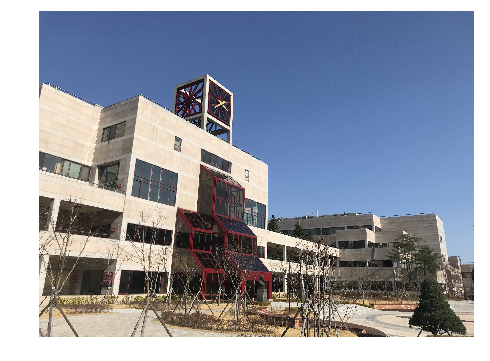

In [3]:
plt.figure(figsize=(10, 6))
plt.imshow(imag1)
plt.axis('off')
plt.show()

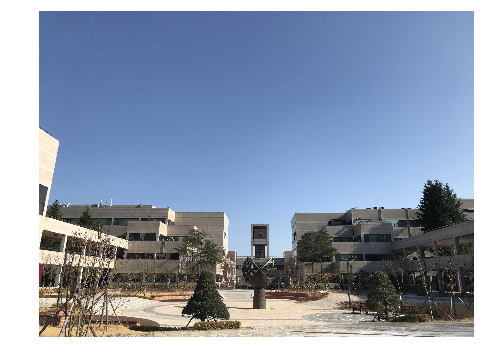

In [4]:
plt.figure(figsize=(10, 6))
plt.imshow(imag2)
plt.axis('off')
plt.show()

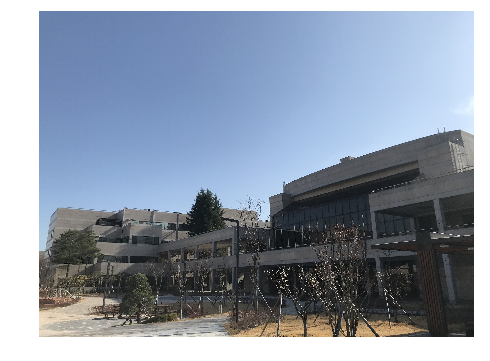

In [5]:
plt.figure(figsize=(10, 6))
plt.imshow(imag3)
plt.axis('off')
plt.show()

# Problem 2 

<br>
<font size='4'><b>Panorama</b></font>

Here, we are explaining the basic concept of homography (i.e., perspective transformation). 

- Any wide-angle view or representation of a physical space
- images with horizontally elongated fields of view


- idea: projecting images onto a common plane

<br>
<img src="./image_files/mosaic.png", width = 500>

<br>
<img src="./image_files/panorama_reference.png", width = 400>

- Camera rotating about its center

<img src="./image_files/Hx.png", width = 500>

 - Two image planes are related by a homography $H$

 Do not worry about a homography transformation. (out of this course's scope)
 
 
 $$ \begin{bmatrix}
x'\\y'\\1
\end{bmatrix}  \sim \begin{bmatrix}
\omega x'\\\omega y'\\\omega
\end{bmatrix} = \begin{bmatrix}
            a & b & c \\
            d & e & f \\            
            g & h & 1 \end{bmatrix}
\begin{bmatrix}
x\\y\\1
\end{bmatrix}            
            $$

- For the advanced learner, watch the following online lecture by Prof. Aaron Bobick

In [6]:
%%html
<center><iframe src="https://www.youtube.com/embed/pU4NorC7lb0?rel=0" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

<br>
<font size='4'><b>Find key points between two images</b></font>

 
- Suppose these matching points are given.
    - We have manually found the matching points for you, although there is a technique to do this automatically.     


- pos1 and pos2 are matching points between img01 and img02
- pos3 and pos4 are matching points between img02 and img03

In [7]:
pos1 = np.array([[2121, 2117, 2749, 3095, 3032, 3375, 3677, 3876], 
                 [1431, 2034, 2033, 1885, 2017, 2037, 1885, 2279]])
pos2 = np.array([[188, 58, 828, 1203, 1121, 1437, 1717, 1817], 
                 [1217, 1909, 1952, 1827, 1952, 1991, 1870, 2226]])
pos3 = np.array([[2338, 2379, 2658, 2899, 2977, 3272, 2716, 2786], 
                 [1948, 1874, 2000, 1837, 1964, 1966, 2143, 2317]])
pos4 = np.array([[109, 178, 497, 795, 851, 1144, 534, 580], 
                 [1907, 1828, 1988, 1834, 1971, 1993, 2145, 2333]])

## 1) Visualization of key points

In [8]:
## your code here
## Write down your own code to mark the key points (red dots) on the locations of the given images


<font size='4'><b>Estimation of homography H</b></font>

$$ X' = HX $$

where $ X $ and $X'$ are position vectors of key points, and $ H $ is a Perspective Transformation

__Goal: we need to estimate homography $H$ via matching points between two images__


$$\begin{bmatrix}
    x' \\
    y' \\
    1 \end{bmatrix}
    \sim
    \begin{bmatrix}
    \omega x' \\
    \omega y' \\
    \omega \end{bmatrix}
    =
    \begin{bmatrix}
    \theta_{1} & \theta_{2} & \theta_{3} \\
    \theta_{4} & \theta_{5} & \theta_{6} \\
    \theta_{7} & \theta_{8} & 1 \end{bmatrix} 
    \begin{bmatrix}
    x\\
    y\\
    1 
\end{bmatrix}$$

<br>
<font color='red'>Show the following equations from the above homography $H$</font>

<br>
$$ 
\begin{align*}
x' &= \frac{\theta_1 x+\theta_2 y+\theta_3}{\theta_7 x+\theta_8 y+1} \\
y' &= \frac{\theta_4 x+\theta_5 y+\theta_6}{\theta_7 x+\theta_8 y+1}
\end{align*}
$$
<br>
$$ 
\begin{align*}
\theta_1 x+\theta_2 y+\theta_3 -\theta_7 x'x-\theta_8 x'y-x' &= 0 \\
\theta_4 x+\theta_5 y+\theta_6 -\theta_7 y'x-\theta_8 y'y-y' &= 0 
\end{align*}
$$

<br>
<font color='red'>For $m$ pairs of matching potins, show that a feature matrix $\Phi$ can be expressed as follows: </font>

- $ \Phi $ is a feature matrix

$$ \Phi = \begin{bmatrix}
            x_{1} & y_{1} & 1 & 0 & 0 & 0 & -x'_{1}x_{1} & -x'_{1}y_{1}\\
            0 & 0 & 0 & x_{1} & y_{1} & 1 & -y'_{1}x_{1} & -y'_{1}y_{1}\\
            \vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots &\vdots\\
            x_{m} & y_{m} & 1 & 0 & 0 & 0 & -x'_{m}x_{m} & -x'_{m}y_{m}\\
            0 & 0 & 0 & x_{m} & y_{m} & 1 & -y'_{m}x_{m} & -y'_{m}y_{m}\end{bmatrix} $$
         
         
           
- $ \theta $ is a column vector for unknown parameters in a perspective transformation $H$



$$ \theta = \begin{bmatrix}
            \theta_{1} \\
            \theta_{2} \\
            \theta_{3} \\
            \theta_{4} \\
            \theta_{5} \\
            \theta_{6} \\
            \theta_{7} \\
            \theta_{8}
            \end{bmatrix} $$
            
- $b$ is a column vector for corresponding positions in the base image

$$ b = \begin{bmatrix}
            x'_{1} \\ 
            y'_{1} \\
            x'_{2} \\
            y'_{2}  \\
            \vdots \\
            x'_{m} \\
            y'_{m} \end{bmatrix} $$
                    

- It ends up becoming a linear regression problem

$$ \min\limits_{\theta} \lVert \Phi\theta - b \rVert _2^2 $$

$$ \theta^* = (\Phi^T\Phi)^{-1}\Phi^T b $$


## 2) Perspective homography for image 1 and image 2

In [9]:
## your code here
## Construct feature matrix using homography H, and a vector having entries of matching points in image 2 




## your code here
## Define perspective_theta using linear regression

perspective_theta = 

## 3) Perspective homography for image 2 and image 3

In [10]:
## your code here
## Construct feature matrix using homography H, and a vector having entries of matching points in image 2



## your code here
## Define perspective_theta2 using linear regression

perspective_theta3 = 

## Image warping

- Again, do not worry about the image warping (outside lecture's scope)

In [11]:
cv2.warpPerspective?

In [12]:
## Apply image warping on image 1 & image 3 using cv2.warpPerspective function 

## do translation to fit the warping image into a size of (18000, 6500) screen. 
translation = np.matrix([[1, 0, 6000],
                         [0, 1, 2500],
                         [0, 0, 1]])

warpedImage = cv2.warpPerspective(imag1, translation*perspective_theta, (18000, 6500))
warpedImage3 = cv2.warpPerspective(imag3, translation*perspective_theta3, (18000, 6500))

In [13]:
screen = warpedImage.copy()
screen[screen==0] = warpedImage3[screen==0]
screen[2500:3024+2500,6000:4032+6000] = imag2

## Visualize panorama image
plt.figure(figsize=(20, 12))
plt.imshow(screen)
plt.show()